# 1. 데이터 불러오기

titanic파일 인터넷에서 불러오기

In [ ]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml(name='titanic', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


참고를 위해 csv 파일도 첨부해두었습니다.

In [ ]:
# 라이브러리 불러오기

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 데이터 탐색

In [ ]:
df = titanic.data

In [ ]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None


### 이 때, 엑셀로 파일을 탐색하기도 합니다.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    object  
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(5), object(6)
memory usage: 115.4+ KB


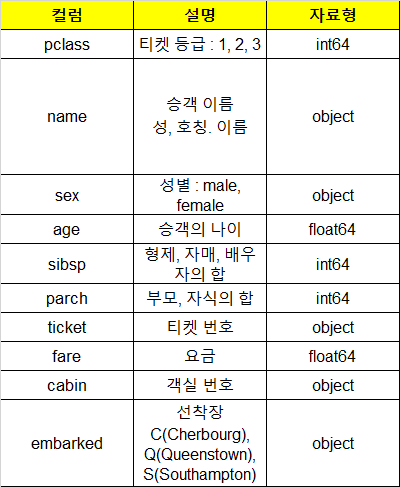

* 참고: 불러온 데이터에는 생존여부 survived는 존재하지 않는다.

### pandas 활용 데이터 탐색

In [ ]:
# 전체 데이터 개수
len(df)

1309

In [ ]:
# 결측값 확인
df.isna().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

* 여기서 못 쓰는 column을 결정한다. column은 세로, row는 가로입니다.
* 전체 1309개의 값중 결측값이 많은 cabin, boat, body, home.dest는 사용하지 못한다고 판단 할 수 있습니다.
* age는 전체의 20% 정도이므로 사용할지 여부를 결정해야 합니다.

In [ ]:
# 이 중 결측값이 많은 cabin, boat, body, home.dest를 지우겠습니다.

df = df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1)

In [ ]:
df.isna().sum()

pclass        0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

In [ ]:
# 또한 결측치가 있는 행을 지우겠습니다.
# 이 때, inplace 는 대체하는지 여부입니다.
df.dropna(inplace=True)

In [ ]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...
1301,3.0,"Youseff, Mr. Gerious",male,45.5000,0.0,0.0,2628,7.2250,C
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,C
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C


In [ ]:
# 각 column별로 어떤 요소가 있는지 조회
print(df['sex'].value_counts())
print()
print(df['pclass'].value_counts())
print()
print(df['sibsp'].value_counts())
print()
print(df['parch'].value_counts())
print()
print(df['ticket'].value_counts())

male      657
female    386
Name: sex, dtype: int64

3.0    500
1.0    282
2.0    261
Name: pclass, dtype: int64

0.0    682
1.0    280
2.0     36
4.0     22
3.0     16
5.0      6
8.0      1
Name: sibsp, dtype: int64

0.0    765
1.0    160
2.0     97
3.0      8
5.0      6
4.0      5
6.0      2
Name: parch, dtype: int64

CA 2144         8
S.O.C. 14879    7
347082          7
3101295         7
347077          7
               ..
28004           1
C.A. 31026      1
248659          1
244361          1
315082          1
Name: ticket, Length: 730, dtype: int64


<Axes: >

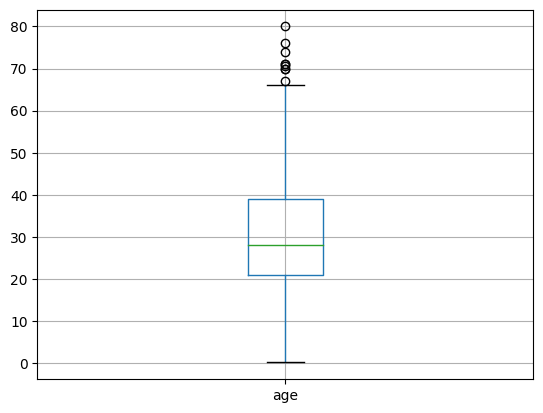

In [ ]:
# 상자그림 그리기
df.boxplot(column=['age'])

# 3. 데이터 전처리

In [ ]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...
1301,3.0,"Youseff, Mr. Gerious",male,45.5000,0.0,0.0,2628,7.2250,C
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,C
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...
1038,3.0,"Youseff, Mr. Gerious",male,45.5000,0.0,0.0,2628,7.2250,C
1039,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,C
1040,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C
1041,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C


In [ ]:
# 범주형 변수 인코딩
df['sex'] = df['sex'].map({'male': 0, 'female': 1}).astype(int)
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [ ]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,24160,211.3375,0
1,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,113781,151.5500,0
2,1.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,113781,151.5500,0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,113781,151.5500,0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,113781,151.5500,0
...,...,...,...,...,...,...,...,...,...
1038,3.0,"Youseff, Mr. Gerious",0,45.5000,0.0,0.0,2628,7.2250,1
1039,3.0,"Zabour, Miss. Hileni",1,14.5000,1.0,0.0,2665,14.4542,1
1040,3.0,"Zakarian, Mr. Mapriededer",0,26.5000,0.0,0.0,2656,7.2250,1
1041,3.0,"Zakarian, Mr. Ortin",0,27.0000,0.0,0.0,2670,7.2250,1


In [ ]:
# 가족 수 변수 생성
df['FamilySize'] = df['sibsp'] + df['sibsp'] + 1

In [ ]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize
0,1.0,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,24160,211.3375,0,1.0
1,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,113781,151.5500,0,3.0
2,1.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,113781,151.5500,0,3.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,113781,151.5500,0,3.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,113781,151.5500,0,3.0
...,...,...,...,...,...,...,...,...,...,...
1038,3.0,"Youseff, Mr. Gerious",0,45.5000,0.0,0.0,2628,7.2250,1,1.0
1039,3.0,"Zabour, Miss. Hileni",1,14.5000,1.0,0.0,2665,14.4542,1,3.0
1040,3.0,"Zakarian, Mr. Mapriededer",0,26.5000,0.0,0.0,2656,7.2250,1,1.0
1041,3.0,"Zakarian, Mr. Ortin",0,27.0000,0.0,0.0,2670,7.2250,1,1.0


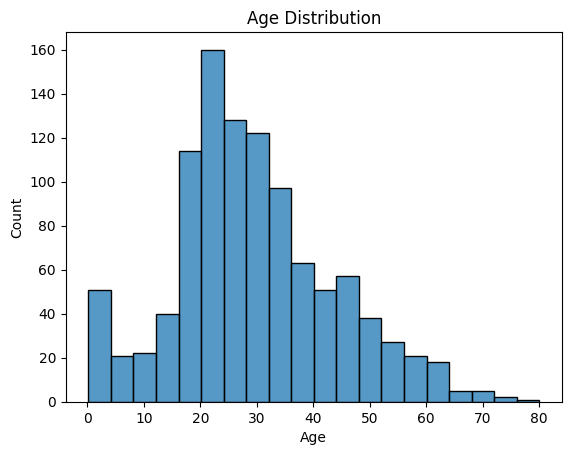

In [ ]:
# 나이 분포 시각화
sns.histplot(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [ ]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,Sex,Embarked,FamilySize
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1,0,1.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,0,0,3.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,1,0,3.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,0,0,3.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3.0,"Youseff, Mr. Gerious",male,45.5000,0.0,0.0,2628,7.2250,C,0,1,1.0
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,C,1,1,3.0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C,0,1,1.0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C,0,1,1.0


In [ ]:
x_data = df[['pclass', 'sex', 'sibsp', 'parch', 'fare']]

In [ ]:
x_data

,pclass,sex,sibsp,parch,fare
0,1.0,1,0.0,0.0,211.3375
1,1.0,0,1.0,2.0,151.5500
2,1.0,1,1.0,2.0,151.5500
3,1.0,0,1.0,2.0,151.5500
4,1.0,1,1.0,2.0,151.5500
...,...,...,...,...,...
1038,3.0,0,0.0,0.0,7.2250
1039,3.0,1,1.0,0.0,14.4542
1040,3.0,0,0.0,0.0,7.2250
1041,3.0,0,0.0,0.0,7.2250


# 4. 저장

In [ ]:
# 전처리된 csv 저장
# encoding 은 utf-8-sig 또는 cp949 추천

df.to_csv('타이타닉.csv', encoding='utf-8-sig')